<a href="https://colab.research.google.com/github/dan-august0/Python_DataScience/blob/main/dataset_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
url_red= 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white= 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'


df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

In [ ]:
df_red['type'] = 'red'
df_white['type'] = 'white'

df_concat = pd.concat([df_red, df_white], ignore_index=True)

print(df_concat.head())
print(df_concat.tail())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

In [ ]:
media_alcool_pandas = df_concat['alcohol'].mean()
print("Média do teor alcoólico (pandas):", media_alcool_pandas)

Média do teor alcoólico (pandas): 10.491800831152839


In [ ]:
media_alcool_numpy = np.mean(df_concat['alcohol'])
print("Média do teor alcoólico (numpy):", media_alcool_numpy)

Média do teor alcoólico (numpy): 10.491800831152839


In [ ]:
media_por_tipo = df_concat.groupby('type')['alcohol'].mean()
print("Média do teor alcoólico por tipo de vinho:\n", media_por_tipo)

Média do teor alcoólico por tipo de vinho:
 type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64


In [ ]:
valores_nan = df_concat.isna().sum()
print("Valores NaN por coluna:\n", valores_nan)


existe_nan = df_concat.isna().any().any()
print("\nExiste algum NaN no dataset?", existe_nan)

Valores NaN por coluna:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Existe algum NaN no dataset? False


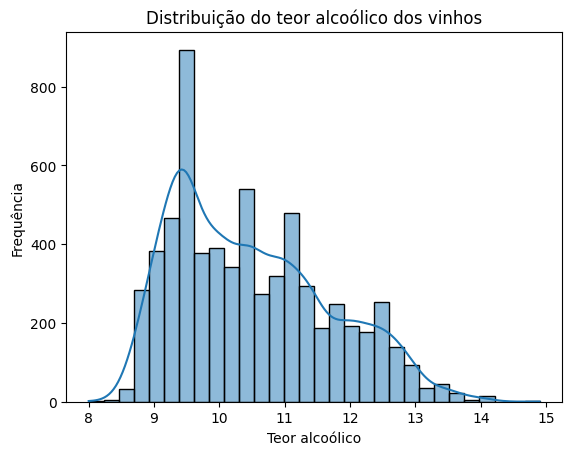

In [ ]:
sns.histplot(data=df_concat, x='alcohol', bins=30, kde=True)
plt.xlabel('Teor alcoólico')
plt.ylabel('Frequência')
plt.title('Distribuição do teor alcoólico dos vinhos')
plt.show()

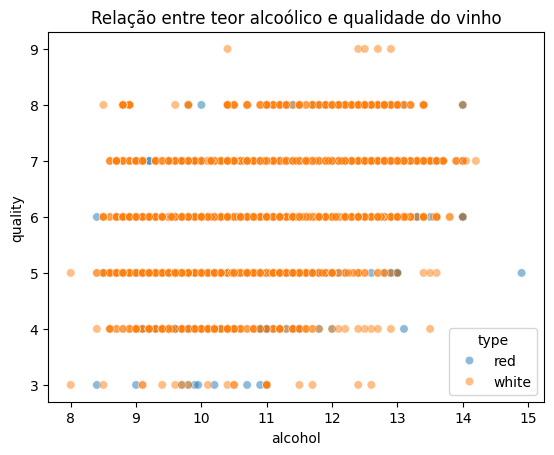

In [ ]:
sns.scatterplot(data=df_concat, x='alcohol', y='quality', hue='type', alpha=0.5)
plt.title('Relação entre teor alcoólico e qualidade do vinho')
plt.show()

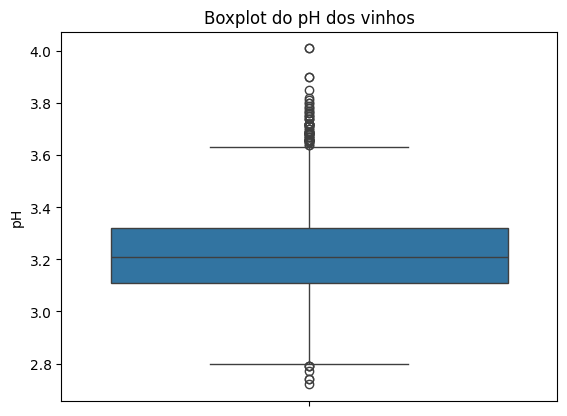

In [ ]:
sns.boxplot(data=df_concat, y='pH')
plt.title('Boxplot do pH dos vinhos')
plt.show()

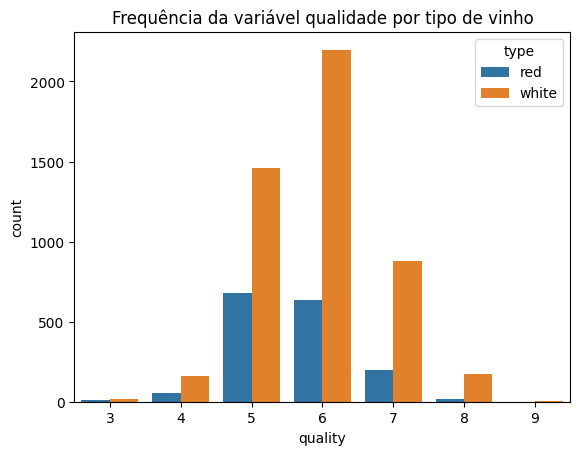

In [ ]:
sns.countplot(data=df_concat, x='quality', hue='type')
plt.title('Frequência da variável qualidade por tipo de vinho')
plt.show()

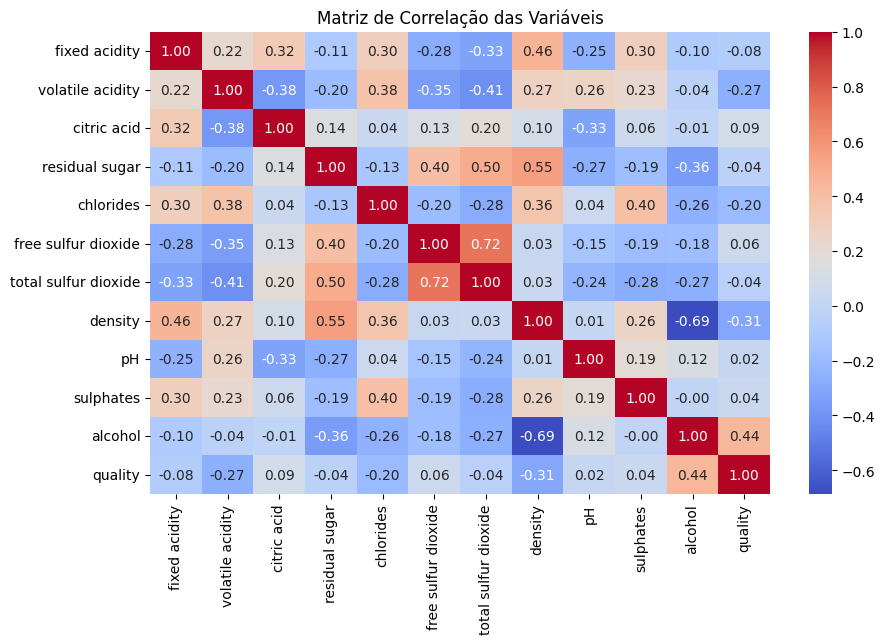

In [ ]:

corr = df_concat.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()

Respostas das Reflexões

**Qual biblioteca você usaria para carregar dados tabulares: numpy ou pandas? Por quê?**

Eu usaria pandas, porque ele já trabalha naturalmente com dados tabulares (linhas e colunas) e permite manipulação direta como groupby, filtragem e operações estatísticas. O numpy é mais indicado para cálculos matemáticos em arrays, mas não é tão prático para dados tabulares com rótulos e diferentes tipos de variáveis.

 **O que você consegue deduzir apenas olhando as colunas e tipos de dados?**

É possível perceber quais variáveis são numéricas contínuas (como pH, álcool, acidez, densidade) e qual é a variável alvo categórica/ordinal (qualidade). Isso já dá uma ideia de quais colunas podem ser usadas para prever a qualidade e quais precisam de tratamento (como normalização, se fosse para machine learning).

**Qual método foi mais rápido/intuitivo? Em que situação você usaria o np.mean em vez do df.mean()?**

O mais intuitivo foi o df.mean() do pandas, porque já funciona diretamente com a coluna do DataFrame. O np.mean seria usado em casos de operações numéricas puras em arrays, como em simulações, modelos matemáticos ou quando os dados já estão em formato NumPy sem rótulos/tabulação.

**Qual abordagem você considera mais clara para tratar NaN?**

A abordagem do pandas é mais clara, pois com dropna() ou fillna() conseguimos remover ou substituir valores ausentes de forma muito simples. O NumPy tem o np.nanmean e outros métodos, mas pandas é mais direto quando lidamos com tabelas.

**O que esses gráficos te ajudam a entender que as médias sozinhas não mostram?**

Os gráficos mostram a distribuição dos dados, possíveis outliers, a variação interna e relações entre variáveis. A média sozinha dá apenas um valor central, mas não mostra a dispersão, a forma da distribuição (assimétrica ou normal), nem como variáveis interagem (ex: álcool e qualidade).

# Conclusão Geral

A análise mostrou que a qualidade do vinho é influenciada principalmente pelo teor alcoólico, sulfatos e acidez volátil. O álcool tem uma correlação positiva com a qualidade, ou seja, vinhos com maior teor alcoólico tendem a ser avaliados como de melhor qualidade. Já a acidez volátil impacta de forma negativa, indicando que níveis altos prejudicam a nota.

Em termos de ferramentas, ficou claro que o pandas é a melhor escolha para carregar e manipular dados tabulares, pois fornece métodos mais intuitivos e diretos que o NumPy para esse tipo de tarefa. O NumPy, por outro lado, é mais útil em cálculos numéricos de baixo nível ou quando os dados já estão organizados em arrays.

Por fim, os gráficos foram essenciais para revelar padrões que as médias sozinhas não mostrariam, como a presença de outliers, a distribuição de variáveis como pH e a relação clara entre álcool e qualidade, insights fundamentais para interpretar melhor os dados.